# Analysing LEGO sets

In [1]:
import numpy as np
import pandas as pd

## Import and first inspection

Read in the dataset `LEGO.csv` and get an initial overview of the data.
The dataset consists of several web scrapes of the LEGO website. When was this and how many sets were recorded in each case?

In the following, we will limit ourselves to the most recent web scrape and look at this partial dataset. As we will not only be using it for reading purposes but will also be creating new columns in it, a real copy of the data is suitable. (By default, the data is not copied during row selection).

In [7]:
LEGO_history["date"].max()

'2025-10-07'

In [44]:
LEGO_history = pd.read_csv("LEGO.csv")
LEGO_history.sort_values("date")

LEGO = LEGO_history[
    (LEGO_history["date"] == LEGO_history["date"].max()) & 
    (~LEGO_history["pieceCount"].isna())].reset_index(drop = True).copy()
LEGO

,name,theme,product_code,ageRange,pieceCount,price,minifigureCount,buildHeight,buildWidth,buildDepth,url,date
0,Eugens Museumssammlung,Animal Crossing™,77056,7+,543.0,79.99,NaN,NaN,NaN,NaN,/de-de/product/blatherss-museum-collection-77056,2025-10-07
1,Bienchens gemütliches Haus,Animal Crossing™,77058,6+,149.0,19.99,NaN,NaN,NaN,NaN,/de-de/product/goldies-cosy-house-77058,2025-10-07
2,Kreative Häuser: Jahreszeiten voller Spaß,Animal Crossing™,77057,7+,814.0,89.99,NaN,NaN,NaN,NaN,/de-de/product/creative-houses-seasons-of-fun-...,2025-10-07
3,Gerds Wohnwagen & Gärtnerei,Animal Crossing™,77054,7+,263.0,29.99,NaN,NaN,NaN,NaN,/de-de/product/leifs-caravan-garden-shop-77054,2025-10-07
4,K.K. spielt auf dem Festplatz,Animal Crossing™,77052,7+,550.0,79.99,NaN,NaN,NaN,NaN,/de-de/product/kks-concert-at-the-plaza-77052,2025-10-07
...,...,...,...,...,...,...,...,...,...,...,...,...
927,Schloss Hogwarts™,Harry Potter™,71043,16+,6020.0,469.99,NaN,NaN,NaN,NaN,/de-de/product/hogwarts-castle-71043,2025-10-07
928,Gringotts™ Zaubererbank – Sammleredition,Harry Potter™,76417,18+,4801.0,429.99,13.0,79.0,32.0,25.0,/de-de/product/gringotts-wizarding-bank-collec...,2025-10-07
929,Der Fuchsbau – Sammleredition,Harry Potter™,76437,18+,2405.0,259.99,10.0,46.0,25.0,23.0,/de-de/product/the-burrow-collectors-edition-7...,2025-10-07
930,Hogwarts Express™ & der Bahnhof von Hogsmeade™,Harry Potter™,76423,8+,1074.0,129.99,NaN,NaN,NaN,NaN,/de-de/product/hogwarts-express-train-set-with...,2025-10-07


## Task 1: Extreme models

- How much does the most expensive current LEGO set cost?
- Which set has the most parts?
- How much money do you have to spend to buy ALL current LEGO sets?
- Which one has the longest name?

In [ ]:
# most expensive current set
LEGO[LEGO["price"] == LEGO["price"].max()]
np.max(LEGO["price"])

#set has the most parts
LEGO[LEGO["pieceCount"] == LEGO["pieceCount"].max()]

#money to buy all current lego sets
np.sum(LEGO.price)
LEGO["price"].sum()

#longest name
LEGO["stringlength"] = LEGO["name"].str.len()
LEGO.sort_values("stringlength")

,name,theme,product_code,ageRange,pieceCount,price,minifigureCount,buildHeight,buildWidth,buildDepth,url,date,stringlength
782,Hub,Powered UP,88009,7+,1.0,49.99,NaN,NaN,NaN,NaN,/de-de/product/hub-88009,2025-10-07,3
27,LOVE,Art,31214,18+,791.0,79.99,NaN,NaN,NaN,NaN,/de-de/product/love-31214,2025-10-07,4
98,I-Aah,BrickHeadz,40797,10+,156.0,9.99,NaN,NaN,NaN,NaN,/de-de/product/eeyore-40797,2025-10-07,5
21,Paris,Architecture,21044,12+,649.0,49.99,NaN,NaN,NaN,NaN,/de-de/product/paris-21044,2025-10-07,5
274,Angel,Disney™,43257,9+,784.0,64.99,NaN,NaN,NaN,NaN,/de-de/product/angel-43257,2025-10-07,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
38,Batman™ im Batmobil™ vs. Harley Quinn™ und Mr....,Batman™,76274,8+,435.0,59.99,NaN,NaN,NaN,NaN,/de-de/product/batman-with-the-batmobile-vs-ha...,2025-10-07,54
129,"Kombinationsset mit Hubschrauber, Löschauto un...",City,60462,7+,874.0,59.99,NaN,NaN,NaN,NaN,/de-de/product/helicopter-fire-truck-submarine...,2025-10-07,54
570,Actionspaß mit Spin und Electro in ihren Dino-...,Marvel,11198,4+,124.0,19.99,NaN,NaN,NaN,NaN,/de-de/product/spin-and-electro-dinosaur-vehic...,2025-10-07,54
957,Mario Kart™ – Interaktiver LEGO® Mario™ & Stan...,LEGO® Super Mario™,72043,7+,278.0,49.99,NaN,NaN,NaN,NaN,/de-de/product/mario-kart-interactive-lego-mar...,2025-10-07,55


## Task 2: Sets per theme

We want to determine the number of sets per topic group and organize the themes according to this number. The topic sizes should then also be visualized as a bar chart.

<Axes: ylabel='theme'>

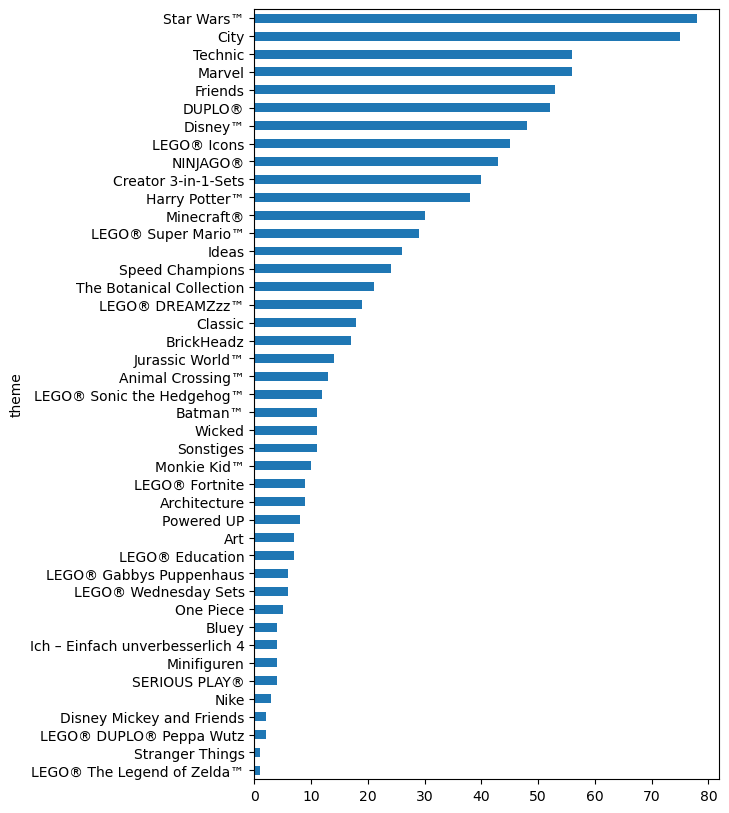

In [56]:
theme_counts = LEGO.groupby("theme").size().sort_values()
#LEGO.groupby("theme").price.mean()
theme_counts.plot.barh(figsize=(6,10))


## Task 3: For which themes is the price per individual component particularly high?

Determine the price per individual part for each set and calculate the mean value for each theme group. Then visualize your result as a bar chart.

<Axes: ylabel='theme'>

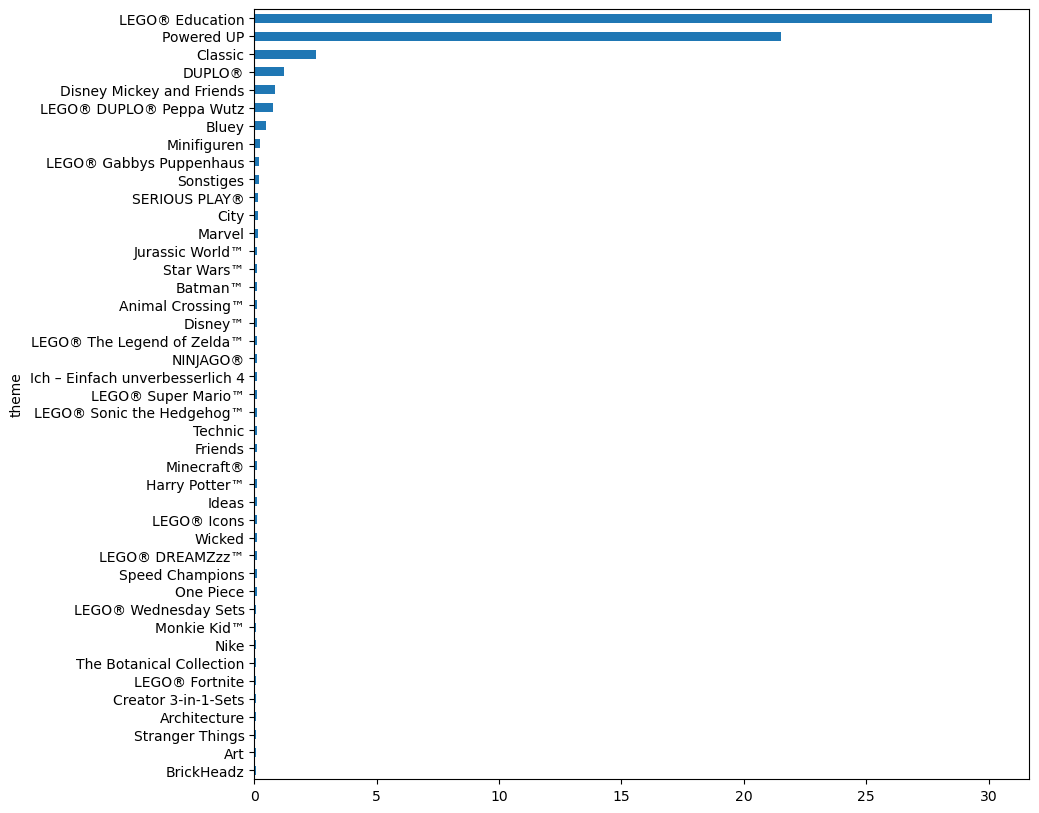

In [74]:
LEGO["price_per_piece"] = LEGO["price"]/LEGO["pieceCount"]
price_per_piece_theme = LEGO.groupby("theme").price_per_piece.mean().sort_values(ascending = True)
price_per_piece_theme.plot.barh(figsize = (10, 10))
